In [24]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import torch
import librosa

**Preprocessing**

In [6]:
ravdess_emotions = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad',\
                   '05':'angry', '06':'fear', '07':'disgust','08':'surprise'}

In [19]:
processed_data = []
# Folder path of the data 
data_path = 'data/speech-emotion-recognition-ravdess-data/'

# Extracting Label of audio clip from the file name based on the name of the dataset. 
for root, dirs, files in os.walk(data_path):
    for file in files: 
        if not file.endswith('.DS_Store'):
            file_path = os.path.join(root, file)
            # Split the file name based on dataset 
            emotion = ravdess_emotions[file.split('-')[2]]
            #print(emotion)
            processed_data.append([file_path, emotion])
        
# Compute Recipe Outputs: 
speech_data_processed_df = pd.DataFrame(processed_data, columns=['file_name','emotions'])


In [20]:
speech_data_processed_df.head()

,file_name,emotions
0,data/speech-emotion-recognition-ravdess-data/A...,angry
1,data/speech-emotion-recognition-ravdess-data/A...,fear
2,data/speech-emotion-recognition-ravdess-data/A...,fear
3,data/speech-emotion-recognition-ravdess-data/A...,angry
4,data/speech-emotion-recognition-ravdess-data/A...,disgust


**Acoustic Feature Extraction**

In [27]:
import wave

In [28]:
sf_filewave = wave.open('data/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav')
signal_sf = sf_filewave.readframes(-1)

# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')

# Get the sound wave frame rate 
framerate_sf = sf_filewave.getframerate()

# Find the sound wave timestamps 
time_sf = np.linspace(start=0, stop=len(soundwave_sf)/framerate_sf, num=len(soundwave_sf))

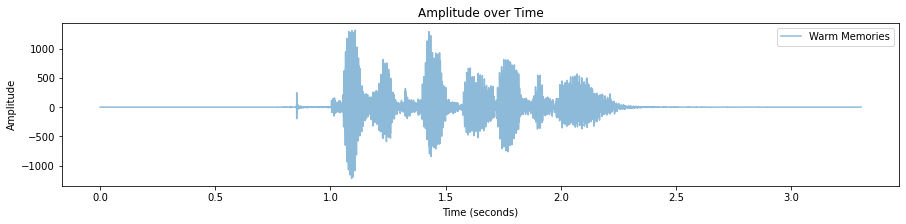

In [30]:
fig, ax = plt.subplots(figsize=(15,3))

# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
plt.legend()
plt.show()

In [25]:
def extract_features(X, sample_rate): 
    result = np.array([])
    
    # Mel Spectrogram: 
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result 

In [31]:
#extract_features(X, 60)